# Aula 03 \ 
Será visto os seguintes códigos

Numpy arrays e pandas Dataframes \
Open and export files \
Conditional Statements \
Loops em Python \
Functions - def 

# 1.1 Numpy arrays

In [1]:
# lembrar de importar as bibliotecas
import numpy as np

# Criando um vetor de dados aleatórios
data = np.random.rand(1000,2)

# Verificando o tamanho do vetor
print(data.shape)
print(np.size(data))

# Print de uma amostra dos dados
print(data[0:10])
print(data[0:10].shape)

(1000, 2)
2000
[[0.79601618 0.04756608]
 [0.17430186 0.3021867 ]
 [0.85205981 0.12352847]
 [0.01436487 0.86732195]
 [0.19083534 0.25471565]
 [0.5334185  0.07483883]
 [0.41199679 0.82810355]
 [0.78501535 0.4780788 ]
 [0.62829835 0.92160752]
 [0.10206698 0.76523914]]
(10, 2)


In [2]:
# Usando Monte-Carlo
# Colocando um limite de data para pegar os intervalos
dataMax = 1000
dataMin = 10
data = (dataMax - dataMin)*data + dataMin
print(data[0:10])

[[798.05602057  57.0904173 ]
 [182.55883886 309.16483154]
 [853.53921211 132.29318653]
 [ 24.22121642 868.64873212]
 [198.92698171 262.16849527]
 [538.08431927  84.09044496]
 [417.87682701 829.82251002]
 [787.16519637 483.29801522]
 [632.01537143 922.3914465 ]
 [111.04631143 767.58675119]]


<class 'numpy.ndarray'>


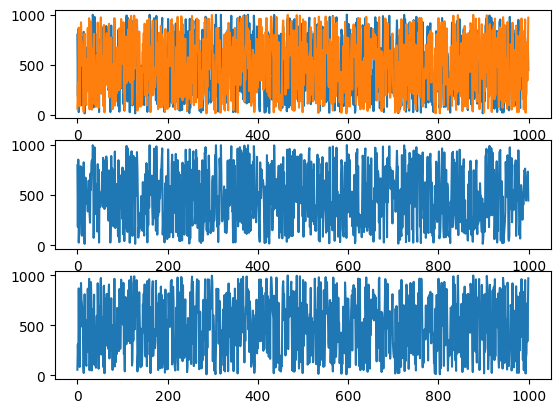

In [3]:
# bibliotecas que são baixadas para ser possível o uso nos códigos
import matplotlib.pyplot as plt

fig, ax = plt.subplots(3)
ax[0].plot(data)
ax[1].plot(data[:,0])
ax[2].plot(data[:,1])
print(type(data))

In [4]:
# Criando um dado 2D 
data3d = np.sin(np.random.rand(1000,1000))
print(data3d)

[[0.32178632 0.58686061 0.61590075 ... 0.65086327 0.29085788 0.08944542]
 [0.82170255 0.11007452 0.29323144 ... 0.29947932 0.48965994 0.74466026]
 [0.65157271 0.23873291 0.1098847  ... 0.30115493 0.6977125  0.50292682]
 ...
 [0.60849343 0.7123024  0.65868478 ... 0.02019534 0.7291351  0.25246569]
 [0.49545894 0.36929199 0.62478369 ... 0.45301472 0.65809581 0.71584058]
 [0.77034428 0.25813197 0.73181175 ... 0.64636297 0.38733202 0.31686387]]


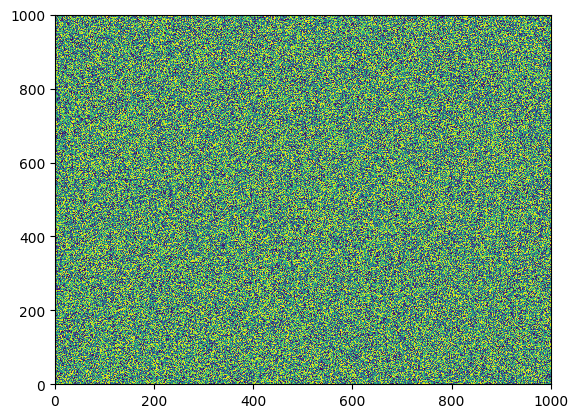

In [5]:
# Plotando um dado 3D
fig2, ax2 = plt.subplots()
ax2.pcolor(data3d)

In [6]:
# Criando vertor temporal
dtime = np.arange(np.datetime64("2022-01-01"), np.datetime64("2023-01-01"), np.timedelta64(1, "h"))
print(dtime[1:10])
print(dtime.shape)
print(type(dtime))

['2022-01-01T01' '2022-01-01T02' '2022-01-01T03' '2022-01-01T04'
 '2022-01-01T05' '2022-01-01T06' '2022-01-01T07' '2022-01-01T08'
 '2022-01-01T09']
(8760,)
<class 'numpy.ndarray'>


# Pandas

In [7]:
import pandas as pd

# Criando um dataframe
df = pd.DataFrame()

In [8]:
# Monstrando um dataframe
df['datetime'] = dtime

In [9]:
# Criando uma coluna random dentro do dataframe df
df['random'] = np.random.rand(df.shape[0])

In [10]:
df['random'][1:10]

1    0.854068
2    0.592350
3    0.935404
4    0.473322
5    0.507689
6    0.809543
7    0.410749
8    0.674416
9    0.920245
Name: random, dtype: float64

In [11]:
# Indexação
df.iloc[:,0]

0      2022-01-01 00:00:00
1      2022-01-01 01:00:00
2      2022-01-01 02:00:00
3      2022-01-01 03:00:00
4      2022-01-01 04:00:00
               ...        
8755   2022-12-31 19:00:00
8756   2022-12-31 20:00:00
8757   2022-12-31 21:00:00
8758   2022-12-31 22:00:00
8759   2022-12-31 23:00:00
Name: datetime, Length: 8760, dtype: datetime64[s]

In [12]:
# Colocando o datetime como index
df = df.set_index(df['datetime'])
df

,datetime,random
datetime,,
2022-01-01 00:00:00,2022-01-01 00:00:00,0.999392
2022-01-01 01:00:00,2022-01-01 01:00:00,0.854068
2022-01-01 02:00:00,2022-01-01 02:00:00,0.592350
2022-01-01 03:00:00,2022-01-01 03:00:00,0.935404
2022-01-01 04:00:00,2022-01-01 04:00:00,0.473322
...,...,...
2022-12-31 19:00:00,2022-12-31 19:00:00,0.975975
2022-12-31 20:00:00,2022-12-31 20:00:00,0.819230
2022-12-31 21:00:00,2022-12-31 21:00:00,0.083374


In [13]:
# Criando colunas com ano, mês e dia
df['year'] = df.index.year
df['month'] = df.index.month
df['day'] = df.index.day

(8760,)


<Axes: xlabel='datetime'>

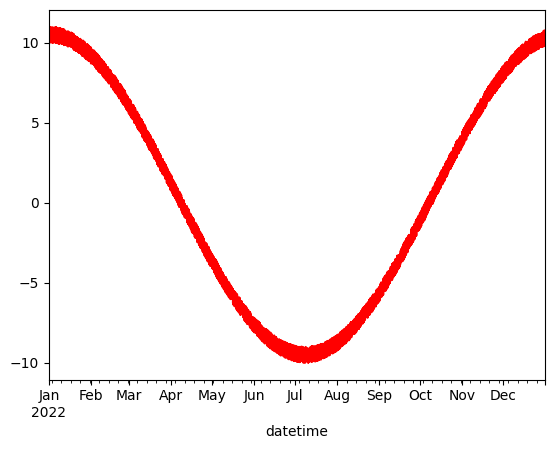

In [14]:
#criando uma série temporal sintetica
tt = np.arange(0,df.shape[0],1)
print(tt.shape)
df['sazonal'] = (np.cos(tt/(360*4)))
df['timeSeries'] = 10*df['sazonal']+df['random']
#df['sazonal'].plot()
df['timeSeries'].plot(color='red')

In [15]:
df

,datetime,random,year,month,day,sazonal,timeSeries
datetime,,,,,,,
2022-01-01 00:00:00,2022-01-01 00:00:00,0.999392,2022,1,1,1.000000,10.999392
2022-01-01 01:00:00,2022-01-01 01:00:00,0.854068,2022,1,1,1.000000,10.854065
2022-01-01 02:00:00,2022-01-01 02:00:00,0.592350,2022,1,1,0.999999,10.592340
2022-01-01 03:00:00,2022-01-01 03:00:00,0.935404,2022,1,1,0.999998,10.935382
2022-01-01 04:00:00,2022-01-01 04:00:00,0.473322,2022,1,1,0.999996,10.473283
...,...,...,...,...,...,...,...
2022-12-31 19:00:00,2022-12-31 19:00:00,0.975975,2022,12,31,0.979401,10.769983
2022-12-31 20:00:00,2022-12-31 20:00:00,0.819230,2022,12,31,0.979541,10.614638
2022-12-31 21:00:00,2022-12-31 21:00:00,0.083374,2022,12,31,0.979680,9.880177


In [16]:
# Salvar meu dataframe
#inverter a barra nos diretorios

df.to_csv(r'I:\airpolution\dados\noisa_2022.csv')

In [17]:
# Criando uma função
def noiseCreation(path, year):
    """Esta função cria um ruido com sazonalidade.
    Inputs:
        path = asdasdas
        year = asdasdasdas

    Criado por Leonardo
    """
    
    # Criando um dataframe
    df = pd.DataFrame()
    
    # Criando vertor temporal
    dtime = np.arange(np.datetime64(str(year)+"-01-01"), np.datetime64(str(year+1)+"-01-01"), np.timedelta64(1, "h"))
    
    # Monstrando um dataframe
    df['datetime'] = dtime
        
    # Datetime como index do dataframe
    df = df.set_index(df['datetime'])
    
    # Criando colunas com ano, mês e dia
    df['year'] = df.index.year
    df['month'] = df.index.month
    df['day'] = df.index.day
    
    # Crio uma coluna random
    df['random'] = np.random.rand(df.shape[0])
    
    # Adicionar sazonalidade
    tt = np.arange(0,df.shape[0],1)
    print(tt.shape)
    df['sazonal'] = (np.cos(tt/(360*4)))
    df['timeSeries'] = 10*df['sazonal']+df['random']
    #df['sazonal'].plot()
    df['timeSeries'].plot(color='red')
    df.to_csv(path+'/noise_'+str(year)+'.csv')
    
    return df

(8760,)


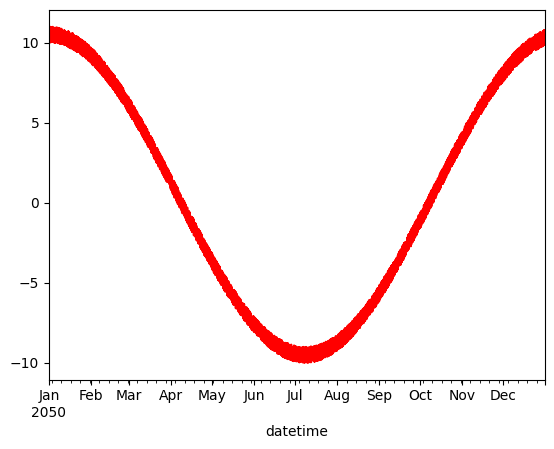

In [18]:
path = 'I:/airpolution/dados/brutos'
df2 = noiseCreation(path,2050)

2002
(8760,)
2003
(8760,)
2004
(8784,)
2005
(8760,)
2006
(8760,)
2007
(8760,)
2008
(8784,)
2009
(8760,)


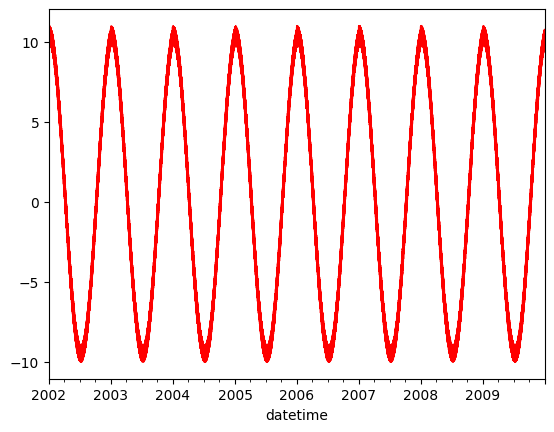

In [19]:
# Primeira opção de loop
for ii in range(2002,2010):
    print(ii)
    df = noiseCreation(path,ii)

In [20]:
df

,datetime,year,month,day,random,sazonal,timeSeries
datetime,,,,,,,
2009-01-01 00:00:00,2009-01-01 00:00:00,2009,1,1,0.856485,1.000000,10.856485
2009-01-01 01:00:00,2009-01-01 01:00:00,2009,1,1,0.799019,1.000000,10.799017
2009-01-01 02:00:00,2009-01-01 02:00:00,2009,1,1,0.031970,0.999999,10.031960
2009-01-01 03:00:00,2009-01-01 03:00:00,2009,1,1,0.314638,0.999998,10.314616
2009-01-01 04:00:00,2009-01-01 04:00:00,2009,1,1,0.912103,0.999996,10.912065
...,...,...,...,...,...,...,...
2009-12-31 19:00:00,2009-12-31 19:00:00,2009,12,31,0.763430,0.979401,10.557437
2009-12-31 20:00:00,2009-12-31 20:00:00,2009,12,31,0.751658,0.979541,10.547065
2009-12-31 21:00:00,2009-12-31 21:00:00,2009,12,31,0.316805,0.979680,10.113607


2001
2030
2032
(8784,)
2053
(8760,)
2060
(8784,)


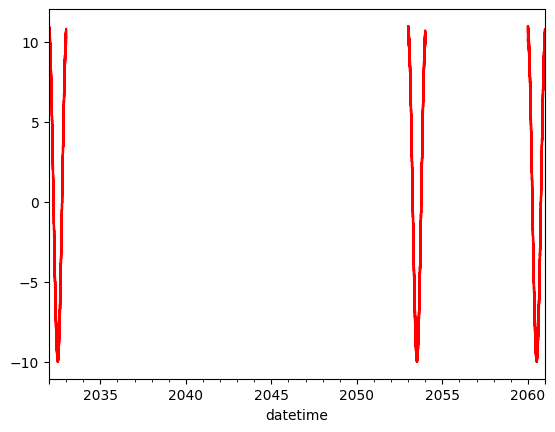

In [21]:
anos = [2001,2030,2032,2053,2060]

for ano in anos:
    print(ano)
    if ano > 2030:
        df = noiseCreation(path,ano)

In [22]:
import os
files = os.listdir(path)
print(files)

allData = []
for file in files:
    if file.endswith('.csv'):
        print(file)
        data = pd.read_csv(path+'/'+file)
        allData.append(data)

['noise_2002.csv', 'noise_2003.csv', 'noise_2004.csv', 'noise_2005.csv', 'noise_2006.csv', 'noise_2007.csv', 'noise_2008.csv', 'noise_2009.csv', 'noise_2032.csv', 'noise_2050.csv', 'noise_2053.csv', 'noise_2060.csv']
noise_2002.csv
noise_2003.csv
noise_2004.csv
noise_2005.csv
noise_2006.csv
noise_2007.csv
noise_2008.csv
noise_2009.csv
noise_2032.csv
noise_2050.csv
noise_2053.csv
noise_2060.csv


In [23]:
allDataDf = pd.concat(allData)

In [24]:
allDataDf

,datetime,datetime.1,year,month,day,random,sazonal,timeSeries
0,2002-01-01 00:00:00,2002-01-01 00:00:00,2002,1,1,0.016719,1.000000,10.016719
1,2002-01-01 01:00:00,2002-01-01 01:00:00,2002,1,1,0.881241,1.000000,10.881238
2,2002-01-01 02:00:00,2002-01-01 02:00:00,2002,1,1,0.221441,0.999999,10.221431
3,2002-01-01 03:00:00,2002-01-01 03:00:00,2002,1,1,0.657462,0.999998,10.657440
4,2002-01-01 04:00:00,2002-01-01 04:00:00,2002,1,1,0.142011,0.999996,10.141973
...,...,...,...,...,...,...,...,...
8779,2060-12-31 19:00:00,2060-12-31 19:00:00,2060,12,31,0.690814,0.982630,10.517114
8780,2060-12-31 20:00:00,2060-12-31 20:00:00,2060,12,31,0.709263,0.982759,10.536849
8781,2060-12-31 21:00:00,2060-12-31 21:00:00,2060,12,31,0.018002,0.982887,9.846870
8782,2060-12-31 22:00:00,2060-12-31 22:00:00,2060,12,31,0.967755,0.983014,10.797899
